In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
# Keras import(s)
import tensorflow.nn as nn
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, MaxPooling2D, AveragePooling2D, UpSampling2D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Custom imports
from funcs.plotting import plot_classifications, plot_training
### I dont think we need this snippet
# from tensorflow.python.keras.backend import set_image_data_format
# set_image_data_format('channels_last')  # Images are formatted as (N, N, 1), with colour-channels last

# Load in data

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
from sklearn.model_selection import train_test_split

In [3]:
# x_train, x_test, y_train, y_test = train_test_split(digits.images, digits.target, test_size=0.8, shuffle=True)

In [4]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Plot the training data

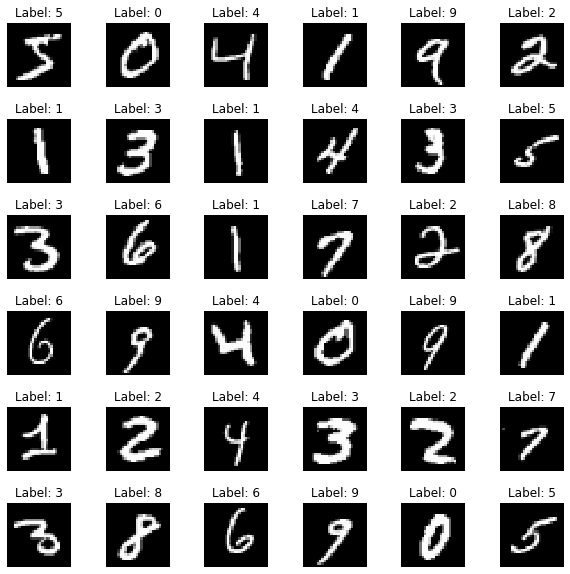

In [5]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(10, 10))
for ax, image, label in zip(axes.ravel(), x_train, y_train):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray, interpolation="nearest")
    ax.set_title("Label: %i" % label)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [6]:
x_train = x_train/x_train.max() # Normalise data so pixel values are between 0 and 1

x_train = x_train[:,:,:,np.newaxis] # Add a new axis to the end. This axis is used to specifiy the RGB channel, however, we are working with greyscale images here.
x_test  = x_test [:,:,:,np.newaxis]
input_shape = x_train.shape[1:]
n_classes   = 10 # we have 10 different classes, ie 10 integers from 0 to 9

In [7]:
# For 8x8
# Connect input, intermediate, and output layers using the Keras functional API
i = Input(shape=input_shape)
x = Conv2D(8, kernel_size=(4,4), activation='relu')(i)
x = MaxPooling2D(pool_size=(3,3))(x)
x = Conv2D(16, kernel_size=(4,4), activation='relu')(x)
x = MaxPooling2D(pool_size=(3,3))(x)
x = Flatten()(x)
x = Dense(20, activation='relu')(x)
o = Dense(n_classes, activation='softmax')(x)

# Create Model
cnn = Model(i, o, name='CNN')

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 8)         136       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 16)          2064      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                340     

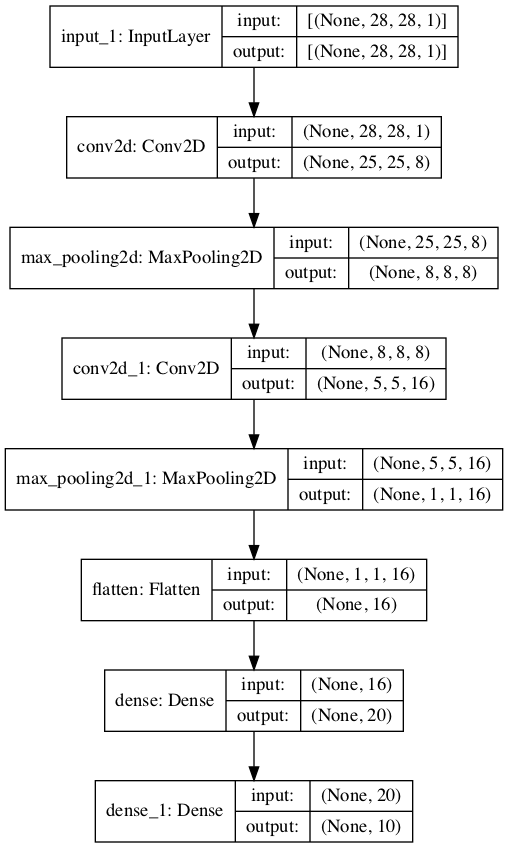

In [8]:
cnn.summary()
plot_model(cnn, show_shapes=True)

In [9]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_cnn = cnn.fit(x=x_train, y=y_train, epochs=10, validation_split=0.2, batch_size=128, verbose=1)

Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 0.9734 - accuracy: 0.6998 - val_loss: 0.3781 - val_accuracy: 0.8889
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 0.3307 - accuracy: 0.8981 - val_loss: 0.2568 - val_accuracy: 0.9239
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.2564 - accuracy: 0.9214 - val_loss: 0.2184 - val_accuracy: 0.9371
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2190 - accuracy: 0.9337 - val_loss: 0.1932 - val_accuracy: 0.9427
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1947 - accuracy: 0.9411 - val_loss: 0.1698 - val_accuracy: 0.9498
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1765 - accuracy: 0.9465 - val_loss: 0.1639 - val_accuracy: 0.9532
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1640 - accuracy: 0.9507 - val_loss: 0.1592 - val_accuracy: 0.9547
Epoch 

Testing accuracy: 95.4%


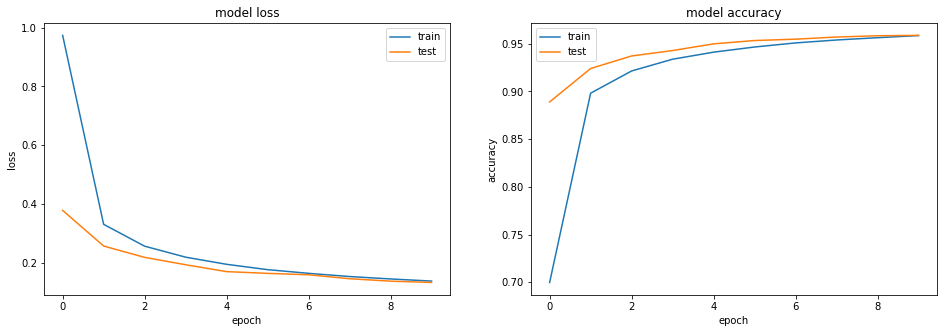

In [10]:
fig, axes = plt.subplots(1,2, figsize = (16,5))
for ax, name in zip(axes, ['loss','accuracy']):
    ax.plot(history_cnn.history[name])
    ax.plot(history_cnn.history['val_'+name])
    ax.set(title='model '+name, xlabel='epoch', ylabel=name)
axes[0].legend(['train', 'test'])
axes[1].legend(['train', 'test'])

# Calculate accuracy on entire test set
_, acc = cnn.evaluate(x_test, y_test, verbose=0)
print("Testing accuracy: {:.1f}%".format(acc * 100.))

# Misclassifications

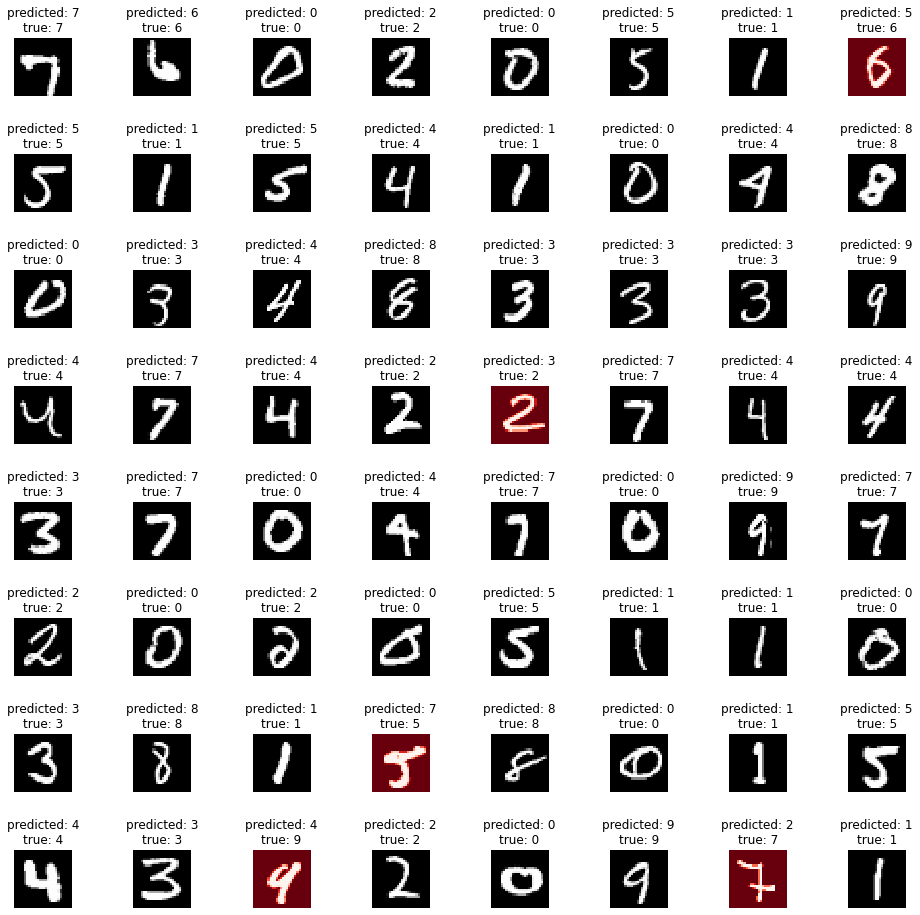

In [11]:
predicted = cnn.predict(x_test).argmax(axis=-1) # Use neural network to predict labels of test set

plot_classifications(x_test, y_test, predicted)

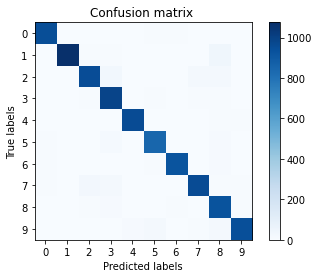

In [12]:
cm = confusion_matrix(y_test, predicted, labels=range(10))

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(range(10))
plt.yticks(range(10))
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

# CNN AE
---

In [13]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(16, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Flatten()(x)
x = Dense(2, activation=None)(x) # Note, we want don't want an activation function here, we just want to return the values in the latent space
output = Dense(10, activation='softmax')(x)

encoder = Model(input_img, output)

encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1570  

In [14]:
encoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
encoder.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=256, verbose=1)

Epoch 1/10
188/188 [==============================] - 8s 40ms/step - loss: 1.6805 - accuracy: 0.3862 - val_loss: 1.3125 - val_accuracy: 0.5127
Epoch 2/10
188/188 [==============================] - 7s 39ms/step - loss: 1.1983 - accuracy: 0.5521 - val_loss: 1.0613 - val_accuracy: 0.6057
Epoch 3/10
188/188 [==============================] - 8s 42ms/step - loss: 1.0187 - accuracy: 0.6434 - val_loss: 0.9237 - val_accuracy: 0.6817
Epoch 4/10
188/188 [==============================] - 8s 45ms/step - loss: 0.8832 - accuracy: 0.7090 - val_loss: 0.7813 - val_accuracy: 0.7436
Epoch 5/10
188/188 [==============================] - 8s 41ms/step - loss: 0.7882 - accuracy: 0.7521 - val_loss: 0.7158 - val_accuracy: 0.7776
Epoch 6/10
188/188 [==============================] - 8s 42ms/step - loss: 0.7430 - accuracy: 0.7735 - val_loss: 0.6763 - val_accuracy: 0.7939
Epoch 7/10
188/188 [==============================] - 8s 42ms/step - loss: 0.7064 - accuracy: 0.7875 - val_loss: 0.6652 - val_accuracy: 0.7991

In [15]:
predicted = encoder.predict(x_test).argmax(axis=-1) # Use neural network to predict labels of test set

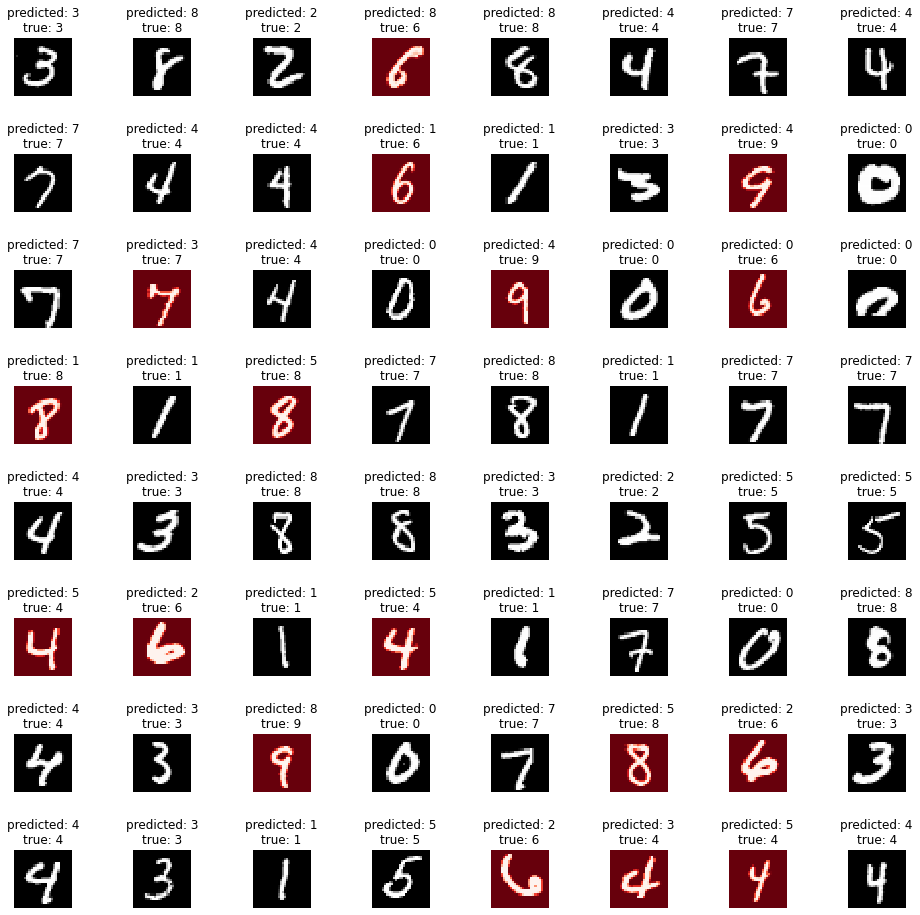

In [16]:
plot_classifications(x_test, y_test, predicted)

In [17]:
new_model = Model(encoder.input, outputs=encoder.layers[-2].output)

In [18]:
latent_output = new_model.predict(x_train)
xlim, ylim = np.array([latent_output.min(axis=0), latent_output.max(axis=0)]).T # Find the maximum extent of activations which we use to set xlim and ylim for 2dhist plots

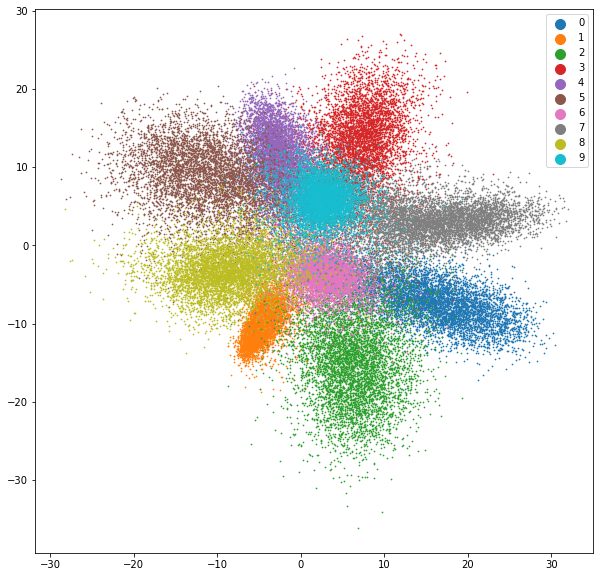

In [19]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
for i in range(n_classes):
    mask = y_train == i
    ax.scatter(*latent_output[mask].T, s=0.5, label=i)

lgnd = ax.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([100])
